# 1 - Représentation graphique

Le principe est proche de la représentation graphique de suites. Pour représenter une fonction $f$ sur un intervalle $[a,b]$, on utilisera la fonction `plot` en lui fournissant une **liste** d'abscisses, des réels régulièrements espacés entre $a$ et $b$, et une **liste** d'ordonnées qui correspondent tout simplement aux images des abscisses par la fonction $f$.

Rappelons les deux façons de créer une liste de valeurs (non entières) régulièrement espacées (voir le mémento) :
* avec `arange` : `arange(a,b,pas)` crée une liste de valeurs comprises dans $[a,b[$ et toutes espacées de la valeur de la variable `pas`.
* avec `linspace` : `linspace(a,b,nb)` crée une liste de `nb` valeurs régulièrement espacées et comprises dans $[a,b]$.


<u>**Exercice 1 :**</u><br>
    
On considère la fonction $f$ définie par  $f~:~x\mapsto \begin{cases} \mathrm{e}^x & \text{ si }x<0 \\ ax^2+bx+c & \text{ sinon} \end{cases}$.
    
1. Ecrire une fonction Python correspondant à cette fonction $f$ (les paramètres $a$, $b$ et $c$ seront fournis en argument).
2. Représenter graphiquement cette fonction pour $a=-1$, $b=2$ et $c=3$. Que dire de la continuité / dérivabilité de cette fonction en $0$ ?
3. Représenter graphiquement cette fonction pour $a=2$, $b=-1$ et $c=1$. Que dire de la continuité / dérivabilité de cette fonction en $0$ ?
4. Représenter graphiquement cette fonction pour $a=3$, $b=1$ et $c=1$. Que dire de la continuité / dérivabilité de cette fonction en $0$ ?
5. Représenter graphiquement cette fonction pour $a=\dfrac{1}{2}$, $b=1$ et $c=1$. Comparer la régularité de cette fonction avec celle du cas précédent.


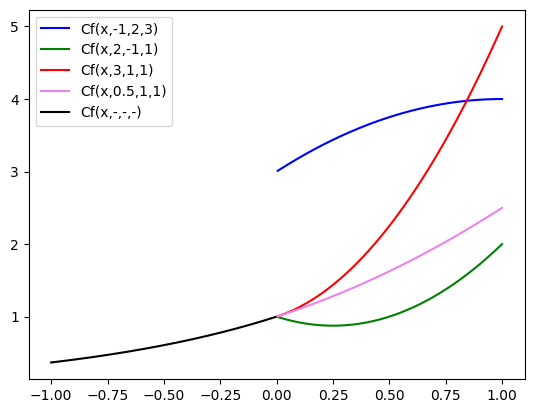

In [1]:
from math import exp
import numpy as np
import matplotlib.pyplot as plt
def f(x,a,b,c): return exp(x) if x<0 else a*x**2+b*x+c
xsm=list(np.linspace(-1,0,200))
xsp=list(np.linspace(0,1,200))
del xsm[xsm.index(0)]
del xsp[xsp.index(0)]

for a,b,c,color in [(-1,2,3, "blue"),(2,-1,1, "green"),(3,1,1, "red"),(1/2,1,1, "violet")]:
    ysp=[f(i, a,b,c) for i in xsp]
    plt.plot(xsp, ysp, label=f"Cf(x,{a},{b},{c})", color=color)
ysm=[f(i, a,b,c) for i in xsm]
plt.plot(xsm, ysm, label=f"Cf(x,-,-,-)", color="black")

plt.legend()
plt.show()

# En 0, les fonctions Cf(x,-1,2,3) et Cf(x,2,-1,1) semble ne pas être dérivable,
# de plus Cf(x,-1,2,3) semble ne pas être continue. Les 2 autres fonctions
# semblent être continues et dérivables sur R.

<u>**Exercice 2 :**</u><br>
    
On considère la fonction $f~:~x\mapsto \dfrac{x^2}{\mathrm{e}^{x}-\mathrm{e}^{-x}}$, définie sur $\mathbb{R}^*$.
1. Représenter graphiquement cette fonction sur $[-3,3]$ (on ajoutera une grille avec la commande `plt.grid()`. Que semble-t-il se passer en $0$ ?
2. Pour un entier $N$ donné (et suffisamment grand...), afficher la valeur de $\dfrac{f(h)}{h}$ lorsque $h=1-\dfrac{i}{N}$ pour $i\in [\![ 0,N-1 ]\!]$. En déduire une valeur estimée de la dérivée du prolongement de $f$ en $0$.
3. Représenter en pointillé la tangente à la courbe de $f$ en $0$ sur la même figure que précédemment.
4. En imaginant que le prolongement par continuité de $f$ réalisé en $0$ soit de classe $C^2$ sur $\mathbb{R}$, que peut-on dire au vu du graphique de $f''(0)$ 
?


C:\Users\Elève\AppData\Local\Temp\ipykernel_3828\1804581517.py:4: RuntimeWarning: invalid value encountered in scalar divide
  def f(x): return (x**2)/(np.exp(x)-np.exp(-x))


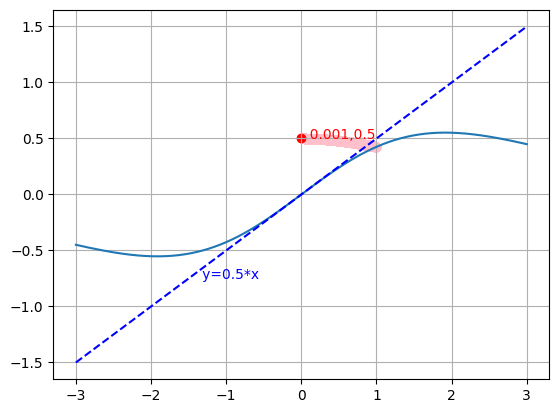

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def f(x): return (x**2)/(np.exp(x)-np.exp(-x))
xs=np.linspace(-3,3,601)
plt.plot(xs, [f(i) for i in xs]) # f n'est pass définie en 0. Python renvoie donc un RuntimeWarning,
                                 # et continue le programme sans tenir compte de cette valeur.
def g(x): return f(x)/x
n=1000
nl=[g(1-(i/n)) for i in range(0,n-1)]
plt.scatter([1-i/n for i in range(0,n-1)], nl, color="pink")
plt.scatter(1-(n-1)/n, g(1-(n-1)/n), color="red")
plt.text(1-(n-1)/n, g(1-(n-1)/n), f"  {round(1-(n-1)/n, 4)},{round(g(1-(n-1)/n),4)}  ", color="red")
k=3
plt.plot([-1*k,1*k], [-0.5*k,0.5*k],"b--")
plt.text(-1*k/2, -0.5*k/2, "   y=0.5*x   ", color="blue")

plt.grid()
plt.show()

# Au vu du graphique, f''(0)=0


# 2 - Recherche de solutions d'équations

Nous avons vu en mathématiques comment assurer l'existence, et parfois l'unicité, de solutions à certaines équations qu'on ne peut pas résoudre de manière exacte. Les outils mathématiques peuvent permettre de localiser aussi précisément que possible les solutions en question, ce qui ouvre la voie à des méthodes numériques d'approximation de ces solutions.

## ◈ Méthode de dichotomie

Soit $f$ une fonction continue sur un intervalle $[a~,~b]$, telle que $f(a)<f(b)$ (si par hasard $f(a)>f(b)$ une astuce consiste à échanger $a$ et $b$). On suppose que $k\in\big[f(a);f(b)\big]$, et on cherche à déterminer $c\in [a;b]$ tel que $f(c)=k$ (le théorème des valeurs intermédiaires nous garantit un succès assuré). 

On définit pour cela deux suites $(u_n)$ et $(v_n)$ : en partant de $u_0=a$ et $v_0=b$, on note $d_0=\dfrac{u_0+v_0}{2}$ (le milieu de l'intervalle...). Si $f(d_0) \leq k$, alors on pose $u_1=d_0$ et $v_1=v_0$, et sinon on pose $u_1=u_0$ et $v_1=d_0$. 

On poursuit la méthode précédente en partant cette fois de l'intervalle $[u_1~,~v_1]$ pour définir $u_2$ et $v_2$ en s'appuyant sur le milieu de l'intervalle, etc... On s'arrête dès que l'écart entre les bornes de l'intervalle $u_n$ et $v_n$ est inférieur à la précision souhaitée.

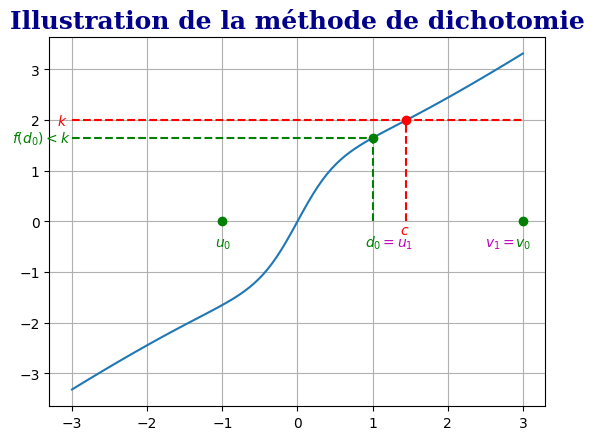

In [2]:
#Illustration de la méthode de dichotomie

import numpy as np, matplotlib.pyplot as plt

def f(x):
    return x*np.exp(1/(x**2+1))

x=np.linspace(-3,3,100)
y=[f(k) for k in x]
plt.close()
plt.title("Illustration de la méthode de dichotomie", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})
plt.plot(x,y)
y2=[2 for k in x]
plt.plot(x,y2,'r--')
plt.text(-3.2, 1.9, "$k$",color='r')
c=1.4481010437011719
plt.text(c-0.08, -0.25, "$c$",color='r')
plt.plot(c,2,'ro')
x=[c,c]
y=[0,2]
plt.plot(x,y,'r--')
y3=[0,0,f(1)]
x3=[-1,3,1]
plt.plot(x3,y3,'go')
plt.text(-1.1, -0.5, "$u_0$",color='g')
plt.text(2.9, -0.5, "$v_0$",color='g')
plt.text(0.9, -0.5, "$d_0$",color='g')
y4=[0,f(1)]
x4=[1,1]
plt.plot(x4,y4,'g--')
y5=[f(1),f(1)]
x5=[-3,1]
plt.plot(x5,y5,'g--')
plt.text(-3.8, f(1)-0.1, "$f(d_0)<k$",color='g')
plt.text(1.1, -0.5, "$=u_1$",color='m')
plt.text(2.5, -0.5, "$v_1=$",color='m')
plt.grid()
plt.show()

<u>**Exercice 3 :**</u> <br>
    
Compléter la fonction suivante pour qu'elle renvoie une solution de l'équation $f(x)=k$, la fonction $f$, les bornes de l'intervalle $[a,b]$, la valeur $k$ et la précision $p$ étant fournis en argument.


In [20]:
from math import sqrt
import numpy as np
def dichotomie(f,a,b,k,p): #p représente la précision souhaitée
    if f(b)<f(a):
        a,b = b,a  # échange de a et b
    if not min(f(a),f(b))<=k<=max(f(a),f(b)):
        return("Erreur : il semble que la valeur donnée n'admet pas d'antécédent par la fonction sur l'intervalle donné")
    else:
        u=a # initialisation de la suite u
        v=b # initialisation de la suite v
        while abs(v-u)>p: # tant que la précision n'est pas atteinte
            d=(u+v)/2 # d représente le milieu de l'intervalle [u,v]
            if (f(u) - k)*(f(d) - k)<0: # test lié à la dichotomie
                v=d # une des bornes de l'intervalle change, l'autre ne bouge pas
            else:
                u=d # une des bornes de l'intervalle change, l'autre ne bouge pas
        return (u+v)/2 # on renvoie le milieu de l'intervalle, histoire d'optimiser la précision

print(dichotomie(sqrt, 0.1,100, 3, 0.01)) # Test avec la fonction racine carrée, avec une valeur et des bornes judicieuses...

print(dichotomie(lambda x:(x*np.exp(1/(x**2+1))), -100,100,5,0.01)) # Test avec la fonction f utilisée dans le graphique ci-dessus, f(x)=x exp(1/(x²+1))

8.999172973632813
4.7943115234375


## ◈ Méthode de Newton

Toute équation pouvant se ramener par simple soustraction à l'annulation d'une fonction, on considère une fonction $f$ définie et dérivable sur un intervalle $[a,b]$ et on suppose que $f$ s'annule en $c \in ]a,b[$.

Le but de la méthode de Newton est de construire une suite $(u_n)$ qui, on l'espère, convergera (rapidement si possible !) vers $c$. Pour cela, on part de $x_0 \in ]a,b[$, que l'on choisira si possible pas trop éloigné de $c$ : on a toujours intérêt, via une étude mathématique préalable par exemple, à ce que l'intervalle $[a,b]$ soit le plus réduit possible.

L'idée de notre ami Newton est de remplacer à chaque étape la courbe de la fonction $f$ par sa tangente : pour $n=0$, on considère la tangente $\mathcal{T}_0$ à la courbe $\mathcal{C}_f$ en $x_0$ qui a pour équation $y=f'(x_0)(x-x_0)+f(x_0)$. Avec beaucoup de réserves mathématiques (lesquelles ?), cette droite $\mathcal{T}_0$ va couper l'axe des abscisses en un point d'abscisse $x_1$ : voilà le terme suivant de la suite. Ceci nous donne un nouveau point de départ à partir duquel on applique le même principe (avec toujours des réserves mathématiques, lesquelles ?) en s'appuyant sur la tangente $\mathcal{T}_1$ à la courbe.

On espère alors que la suite va converger, et que sa limite aura un rapport avec ce qui nous préoccupe. Fort heureusement, sous certaines conditions, ce sera le cas. Nous nous contenterons ici de tenter notre chance et d'espérer la convergence, tout en se prémunissant de boucles infinies.

Comme dans beaucoup de méthodes numériques destinées à approcher une valeur inconnue, en l'absence de critères mathématiques se pose la question du test d'arrêt : comment savoir si nous sommes proches ou non de la valeur cherchée ? Deux points de vue peuvent être adoptés, aucun d'eux ne permettant d'avoir des certitudes sur l'approximation obtenue. Si $\varepsilon$ est la précision souhaitée, on peut :
* s'arrêter lorsque $\left\vert x_{n+1}-x_n \right\vert<\varepsilon$.
* s'arrêter lorsque $\left\vert f(x_n) \right\vert<\varepsilon$.

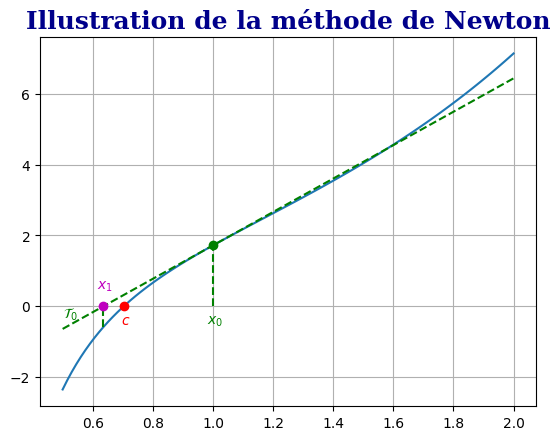

In [1]:
#Illustration de la méthode de Newton
#pour vérifier la non convergence, x^3-2x+2 avec 0 ou 1 comme point de départ...

import numpy as np, matplotlib.pyplot as plt

def f(x):
    return np.exp(x)-1/x**2

def fp(x): #renvoie la dérivée de f
    return np.exp(x)+2/x**3

a=0.5
b=2
x=np.linspace(a,b,100)
y=[f(k) for k in x]
plt.close()
plt.title("Illustration de la méthode de Newton", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})
plt.plot(x,y)

c=0.7034673694654923
plt.text(c-0.01, -0.5, "$c$",color='r')
plt.plot(c,0,'ro')

x3=1
y3=f(x3)
plt.plot(x3,y3,'go')
x=[x3,x3]
y=[0,y3]
plt.plot(x,y,'g--')
plt.text(x3-0.02, -0.5, "$x_0$",color='g')

fp3=fp(x3)
x4=[a,b]
y4=[fp3*(x4[0]-x3)+y3,fp3*(x4[1]-x3)+y3] #tangente en x3
plt.plot(x4,y4,'g--')
plt.text(x4[0], fp3*(x4[0]-x3)+y3+0.3, "$\mathcal{T}_0$",color='g')
x1=x3-y3/fp3
x5=[x1,x1]
y5=[f(x1),0]
plt.plot(x5,y5,'g--')
            
plt.plot(x1,0,'mo')

plt.text(x1-0.02, 0.5, "$x_1$",color='m')

plt.grid()
plt.show()

<u>**Exercice 4 :**</u> <br>
    
1. Compléter la fonction suivante pour qu'elle renvoie une solution de l'équation $f(x)=0$, la fonction $f$, sa dérivée $f'$, les bornes de l'intervalle $[a,b]$ et la précision $p$ étant fournis en argument. On fixera (tout à fait arbitrairement) le premier terme $x_0$ au milieu de l'intervalle $[a,b]$.  

In [29]:
def Newton(f,fp,a,b,precision):
    x=(a+b)/2 # initialisation de la suite
    while abs(f(x))>precision: # on s'appuie par exemple sur le critère lié à f(x_n)
        x=(-f(x)/fp(x))+x # point d'intersection de la tangente avec l'axe des abscisses
    return x

import numpy as np

def f(x):
    return np.exp(x)-1/x**2

def fp(x): # renvoie la dérivée de f
    return np.exp(x)+2/x**3

a=0.5
b=2


print(Newton(f,fp,a,b,1e-4)) # test avec la fonction utilisée pour le graphique précédent

0.7034673694654923


   
2. Utiliser la fonction précédente pour trouver une solution à l'équation $f(x)=x$, où $f(x)=\mathrm{e}^x-\dfrac{\mathrm{e}}{x}$ est une fonction issue d'un mémorable DS, sur l'intervalle $[1,2]$.  


In [39]:
def Newton(f,fp,a,b,precision):
    x=(a+b)/2 # initialisation de la suite
    while abs(f(x))>precision: # on s'appuie par exemple sur le critère lié à f(x_n)
        x=(-f(x)/fp(x))+x # point d'intersection de la tangente avec l'axe des abscisses
    return x

import numpy as np

def g(x):
    return np.exp(x)-np.e/x-x

def gp(x): # renvoie la dérivée de f
    return np.exp(x)+np.e/x**2-1

a=1
b=2
print(Newton(g,gp,a,b,10**-10))

1.2344454129590616


3. Bonus : comparer, sur l'une des situations, la vitesse de convergence entre la méthode de dichotomie et la méthode de Newton. Avantage et inconvénient de chacune des deux ?


In [66]:
def Newton(f,fp,a,b,precision):
    x=(a+b)/2 # initialisation de la suite
    while abs(f(x))>precision: # on s'appuie par exemple sur le critère lié à f(x_n)
        x=(-f(x)/fp(x))+x # point d'intersection de la tangente avec l'axe des abscisses
    return x

def dichotomie(f,a,b,k,p): #p représente la précision souhaitée
    if f(b)<f(a):
        a,b = b,a  # échange de a et b
    if not min(f(a),f(b))<=k<=max(f(a),f(b)):
        return("Erreur : il semble que la valeur donnée n'admet pas d'antécédent par la fonction sur l'intervalle donné")
    else:
        u=a # initialisation de la suite u
        v=b # initialisation de la suite v
        while abs(v-u)>p: # tant que la précision n'est pas atteinte
            d=(u+v)/2 # d représente le milieu de l'intervalle [u,v]
            if (f(u) - k)*(f(d) - k)<0: # test lié à la dichotomie
                v=d # une des bornes de l'intervalle change, l'autre ne bouge pas
            else:
                u=d # une des bornes de l'intervalle change, l'autre ne bouge pas
        return (u+v)/2 # on renvoie le milieu de l'intervalle, histoire d'optimiser la précision





import numpy as np

def g(x):
    return np.exp(x)-np.e/x-x

def gp(x): # renvoie la dérivée de f
    return np.exp(x)+np.e/x**2-1

a=1
b=2
from time import time
start=time()
for _ in range(1000):
    Newton(g,gp,a,b,10**-10)
end=time()
print((end-start))
start=time()
for _ in range(1000):
    dichotomie(g, a,b, 0, 10**-10)
end=time()
print((end-start))

# On remarque que la méthode de Newton est toujours
# plus ou moins plus rapideque la méthode de dichotomie.

0.04200339317321777
0.1850147247314453
